# Feature Extraction
In machine learning, feature extraction aims to computed values (features) from images, intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. These features may be handcrafted (manually computed features based on a-priori information ) or convolutional features (detect patterns within the data without the prior definition of features or characteristics):

## Handcrafted: 
- Histogram features: Statistical moments extracted from the histogram describe image characteristics and provide a quantitative analysis of the image intensity distribution (entropy, intensity mean, standard deviation, skewness, kurtosis, and values at 0, 10, 50 (median) and 90 percentiles).
<img src="../Figures/histogram_sample.jpg" alt="Drawing" style="width: 500px;"/>
- The gradient examines directional changes in the image gray level, and can extract relevant information (such as edges) within an image. Moments extracted from the image gradient are more robust to acquisition conditions, such as contrast variation, and properties of the acquisition equipment . Ten features were extracted from the gray level and morphological gradients (five from each): intensity mean, standard deviation, skewness, kurtosis and percentage of non-zero values.
<img src="../Figures/gradient.png" alt="Drawing" style="width: 300px;"/>
- Local binary pattern (LBP) is a texture spectrum model that may be used to identify patterns in an image. The LBP histogram comprises the frequency of occurrence of different patterns within an image.  Ten features were extracted from the LBP by using a 10-bin LBP histogram.
<img src="../Figures/lbp.png" alt="Drawing" style="width: 400px;"/>
- The Haar wavelet is a multi-resolution technique that transforms images into a domain where both spatial and frequency information is present. Features separately extracted from each sub-image present desired scale-dependent properties. When considering two decomposition levels, eight sub-images are generated. The mean value within each sub-image were computed and used as features (total of eight features). 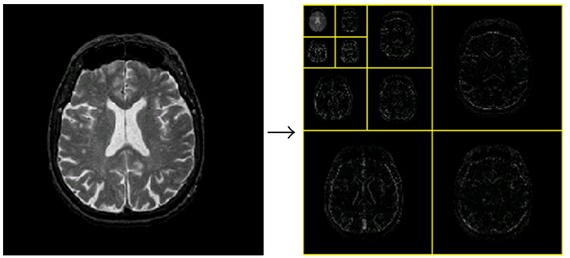

## Convolutional features
Computed by using a very deep convolutional network (VGG16) with pre-trained imagenet weights. For each MR volume, the convolutional features were computed in the central 2D axial, sagittal and coronal slices. For each of these three views, 25,088 convolutional features were computed and combined. 
<img src="../Figures/viz_initial_layers.png" alt="Drawing" style="width: 700px;"/>

Besides the image and patient information (MR vendor, magnetic field, age, gender), a total of 75,300 features were extracted and combined for each image: 8 features from the image histogram, 10 features from the image gradient, 10 features from the LBP histogra, 8 features from the Haar wavelet subimages and 75,264 convolutional features. 

<img src="../Figures/data.png" alt="Drawing" style="width: 800px;"/>


## References
- Histogram basics: https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html
- Local binary patterns: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
- Wavelet haar to MRI: https://www.researchgate.net/figure/The-procedures-of-3-level-2D-DWT-a-normal-brain-MRI-b-level-3-wavelet-coefficients_258104202
- Extracting convolutional features using Vgg16: https://keras.io/applications/

In [3]:
## Reading the data file containing patients information and features ##
## data: vendor; magnetic field; age; gender; feats (65300) 
    # vendor: ge -> 10; philips -> 11; siemens -> 12
    # gender: female -> 10; male -> 11
    # feats: fs1 - histogram (8); fs2 - gradient (10); fs3 - lbp (10); fs4 - haar (8); fs5 - convolutional (75264)
import numpy as np
import os

data = np.load(os.path.join('../Data/'+"feats_cc359.npy"))
print '#samples, #info: ',data.shape

print 'patients age:', data[:,2]

#samples, #info:  (359, 75304)
patients age: [ 55.  56.  63.  67.  62.  63.  62.  60.  69.  69.  49.  43.  66.  62.  44.
  55.  50.  41.  57.  65.  48.  43.  43.  65.  51.  65.  41.  63.  51.  42.
  65.  44.  67.  43.  49.  49.  41.  41.  41.  55.  61.  67.  58.  36.  49.
  42.  54.  53.  43.  45.  44.  51.  39.  46.  44.  39.  61.  64.  55.  29.
  55.  52.  53.  49.  42.  46.  57.  49.  56.  80.  56.  31.  49.  53.  41.
  44.  43.  42.  47.  55.  67.  64.  66.  46.  71.  42.  42.  51.  46.  37.
  51.  60.  60.  45.  43.  36.  45.  48.  51.  60.  52.  50.  56.  34.  52.
  41.  38.  51.  57.  44.  51.  60.  45.  60.  49.  50.  49.  49.  53.  58.
  61.  53.  58.  57.  65.  54.  58.  54.  54.  57.  41.  71.  64.  54.  52.
  64.  65.  56.  56.  57.  53.  59.  55.  43.  62.  38.  58.  58.  53.  47.
  71.  51.  52.  55.  57.  55.  54.  53.  54.  57.  55.  39.  64.  54.  44.
  39.  55.  38.  44.  55.  51.  52.  51.  41.  50.  45.  57.  55.  53.  39.
  36.  60.  58.  60.  52.  62.  63.  55.  6

# Questions:

1. Print the vendor for all the images
2. Identify images acquired from patients with age > 30
3. Identify images acquired using GE vendor scanner
4. Access this simple demo of a convnet trained on MNIST dataset: https://transcranial.github.io/keras-js/#/mnist-cnn
    4.1 draw a number (between 0-9)
    4.2 Visualize classification and intermediate outputs at each layer